In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c vietai-advance-retinal-disease-detection-2020

 92% 56.0M/61.0M [00:01<00:00, 42.5MB/s]
100% 61.0M/61.0M [00:01<00:00, 35.7MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/vietai-advance-retinal-disease-detection-2020.zip', 'r') as zip_ref:
    zip_ref.extractall('Retinal Disease Detection')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Train_df = pd.read_csv('/content/Retinal Disease Detection/train.csv')
Submission_df = pd.read_csv('/content/Retinal Disease Detection/sample_submission.csv')

In [ ]:
Train_df.head()

,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal
0,c24a1b14d253.jpg,0,0,0,0,0,1,0
1,9ee905a41651.jpg,0,0,0,0,0,1,0
2,3f58d128caf6.jpg,0,0,1,0,0,0,0
3,4ce6599e7b20.jpg,1,0,0,0,1,0,0
4,0def470360e4.jpg,1,0,0,0,1,0,0


In [ ]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3435 entries, 0 to 3434
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   filename                    3435 non-null   object
 1   opacity                     3435 non-null   int64 
 2   diabetic retinopathy        3435 non-null   int64 
 3   glaucoma                    3435 non-null   int64 
 4   macular edema               3435 non-null   int64 
 5   macular degeneration        3435 non-null   int64 
 6   retinal vascular occlusion  3435 non-null   int64 
 7   normal                      3435 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 214.8+ KB


In [ ]:
Train_df.describe()

,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal
count,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000
mean,0.446288,0.219796,0.173799,0.150218,0.167103,0.128093,0.152838
std,0.497179,0.414169,0.378992,0.357337,0.373122,0.334242,0.359884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Train_df.isna().sum()
#No null values

filename                      0
opacity                       0
diabetic retinopathy          0
glaucoma                      0
macular edema                 0
macular degeneration          0
retinal vascular occlusion    0
normal                        0
dtype: int64

In [ ]:
Train_df['opacity'].value_counts()

0    1902
1    1533
Name: opacity, dtype: int64

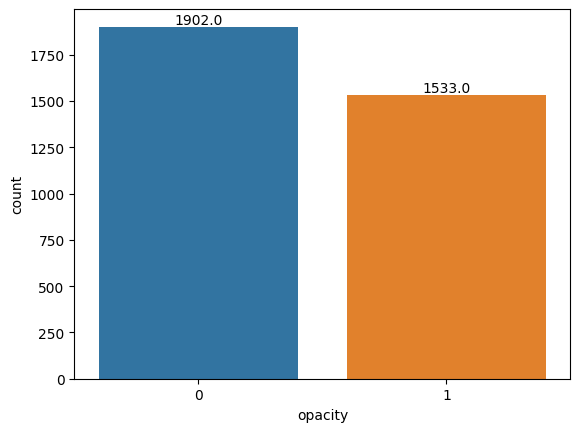

In [ ]:
ax = sns.countplot(x='opacity', data=Train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

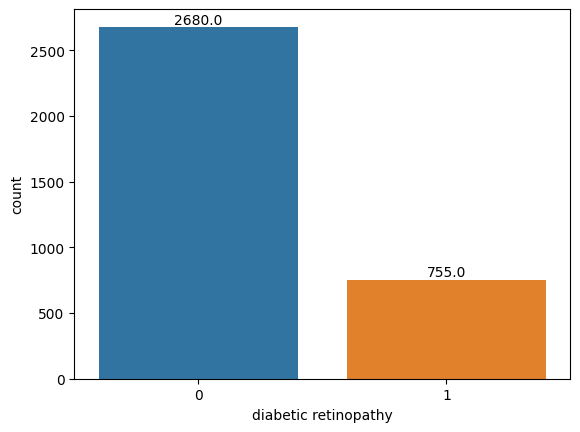

In [ ]:
ax = sns.countplot(x='diabetic retinopathy', data=Train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

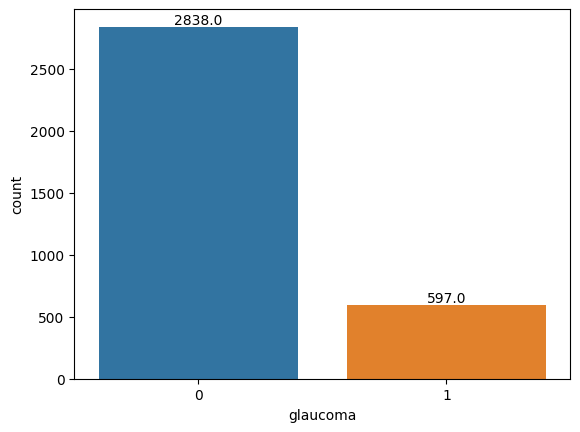

In [ ]:
ax = sns.countplot(x='glaucoma', data=Train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

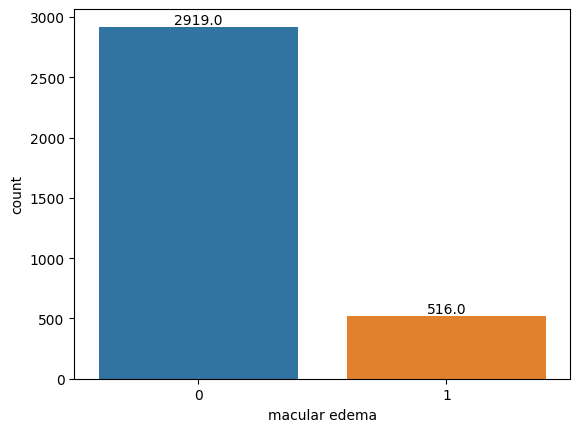

In [ ]:
ax = sns.countplot(x='macular edema', data=Train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

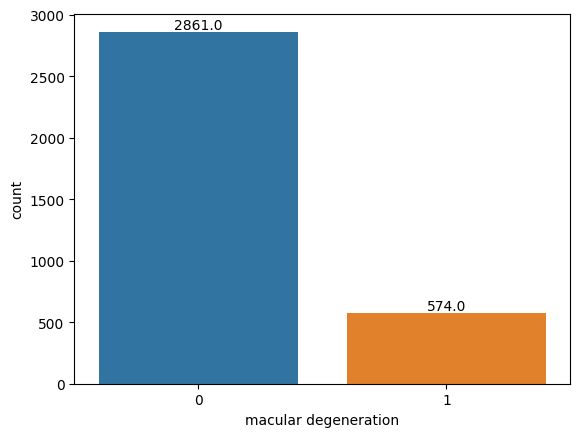

In [ ]:
ax = sns.countplot(x='macular degeneration', data=Train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

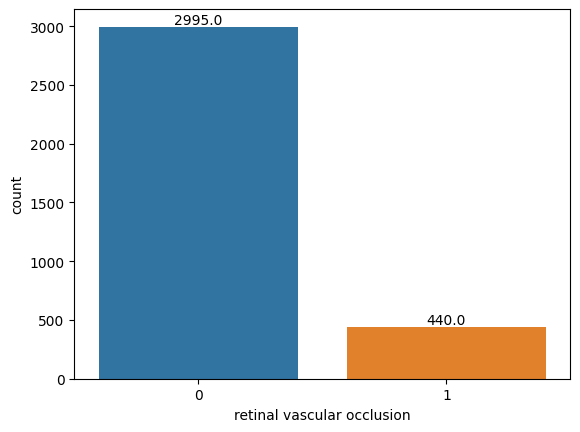

In [ ]:
ax = sns.countplot(x='retinal vascular occlusion', data=Train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

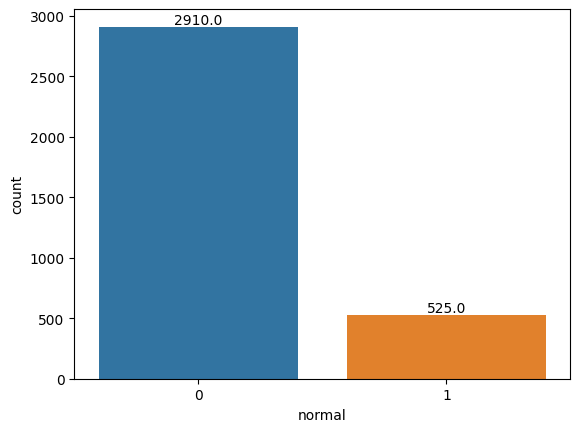

In [ ]:
ax = sns.countplot(x='normal', data=Train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
# Therefore, we can conclude that the given dataset is not balanced(i.e it is imbalanced).

Display Random Images


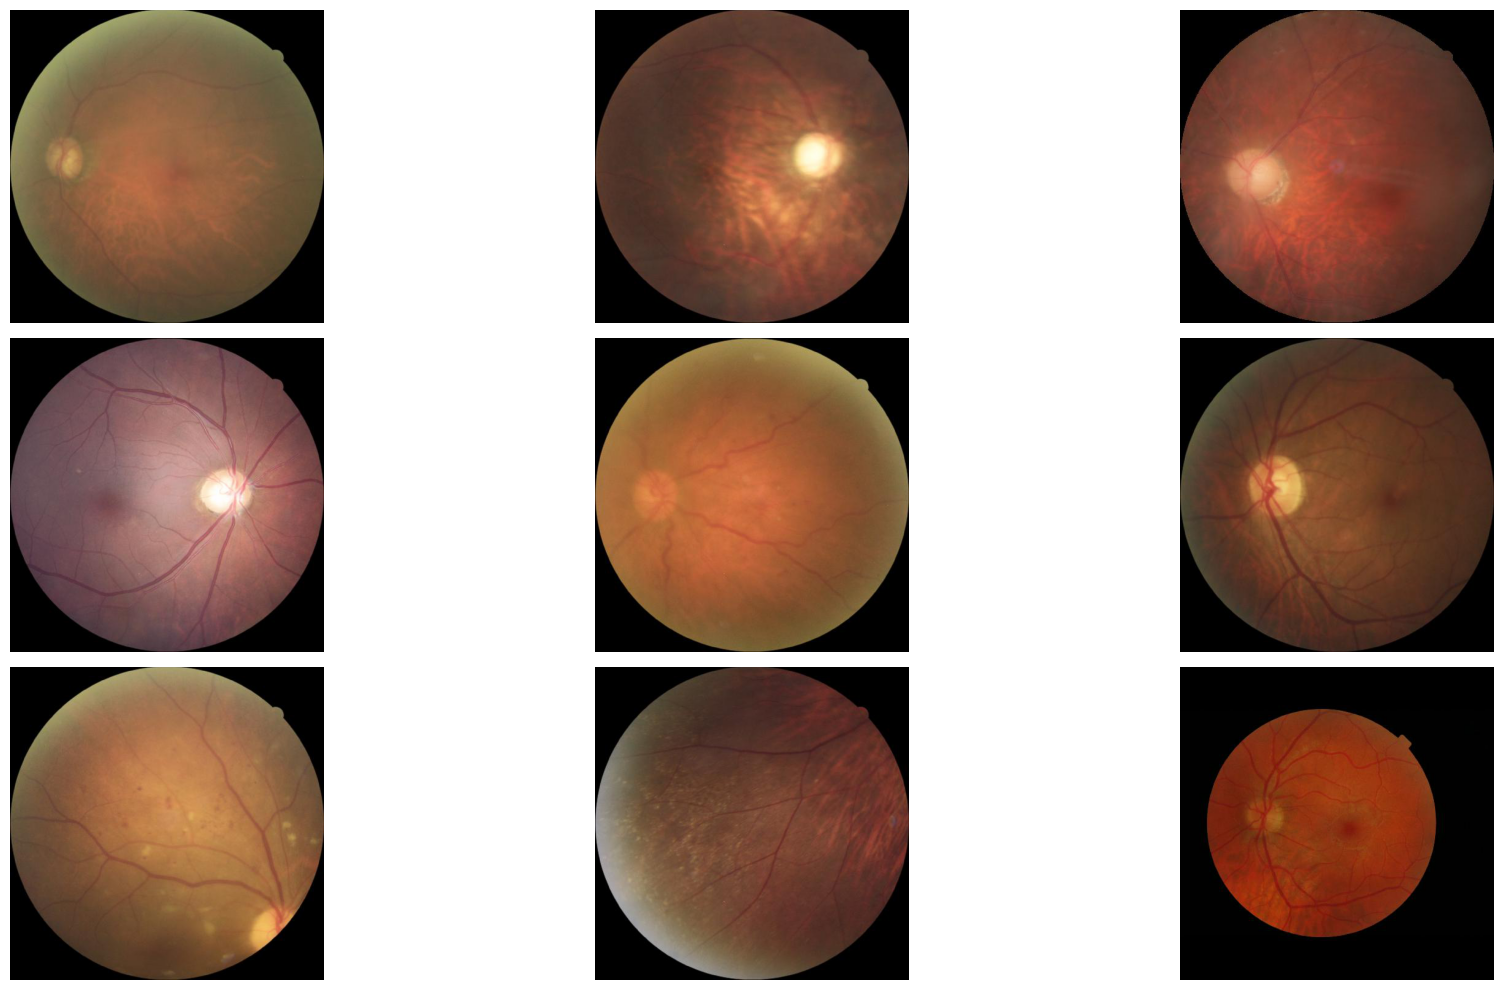

In [ ]:
# Extract numpy values from Image column in data frame
eye_images = Train_df['filename'].values

# Extract 9 random images from it
random_eye_images = [np.random.choice(eye_images) for i in range(9)]

# Location of the image dir
path = '/content/Retinal Disease Detection/train/train'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(path, random_eye_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout() 

In [ ]:
Train_data, Val_data = train_test_split(Train_df, test_size = 0.4, random_state=42, shuffle=True)

In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                             featurewise_center = True,
                                                             featurewise_std_normalization = True)

In [ ]:
#ImageDataGenerator only accepts a list of strings as categorical values for the images

In [ ]:
def build_the_labels(row):
  return [Train_df.columns[ind + 1] for ind, val in enumerate(row[1:]) if val == 1]


Train_data['label'] = Train_data.apply(lambda x : build_the_labels(x), axis=1)
Val_data['label'] = Val_data.apply(lambda x: build_the_labels(x), axis=1)

In [ ]:
Train_data.head(10)

,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal,label
3261,7750af2c7a45.jpg,0,0,0,0,0,0,1,[normal]
2821,10f2e6163087.jpg,0,1,0,0,0,0,0,[diabetic retinopathy]
1302,5156411c155a.jpg,1,0,0,0,0,0,0,[opacity]
1000,e0a896493913.jpg,1,0,0,0,0,0,0,[opacity]
1778,d631c81e51f2.jpg,1,0,0,0,0,0,0,[opacity]
18,10ee8c8a72b4.jpg,1,1,0,1,0,0,0,"[opacity, diabetic retinopathy, macular edema]"
493,3be695cc5747.jpg,1,0,1,0,0,0,0,"[opacity, glaucoma]"
1125,2b0a27b3d4a4.jpg,1,1,0,1,0,0,0,"[opacity, diabetic retinopathy, macular edema]"
1820,81c9023e15f6.jpg,0,0,1,0,0,0,0,[glaucoma]
1606,78bac43f1a83.jpg,1,0,1,0,0,0,0,"[opacity, glaucoma]"


In [ ]:
Val_data.head(10)

,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal,label
1713,338d390b0d66.jpg,0,0,1,0,0,0,0,[glaucoma]
1637,fecbf8136bd5.jpg,0,0,0,1,0,1,0,"[macular edema, retinal vascular occlusion]"
929,87d08361bcbc.jpg,0,0,0,0,1,0,0,[macular degeneration]
2966,da0d0c7e9336.jpg,0,0,0,0,0,0,1,[normal]
203,4271f6a1bc34.jpg,1,0,0,1,0,1,0,"[opacity, macular edema, retinal vascular occl..."
1494,ac713827c7cb.jpg,1,0,0,0,0,0,0,[opacity]
2380,19a39631f0b2.jpg,0,0,1,0,0,0,0,[glaucoma]
1465,92cd7989f9ff.jpg,0,0,0,1,0,1,0,"[macular edema, retinal vascular occlusion]"
557,76cdc6a3e9a9.jpg,1,0,0,0,1,0,0,"[opacity, macular degeneration]"
567,6ef741ba4c43.jpg,0,1,0,0,0,0,0,[diabetic retinopathy]


In [ ]:
IMG_SIZE = 224                              # Image size (224x224)
IMAGENET_MEAN = [0.485, 0.456, 0.406]         # Mean of ImageNet dataset (used for normalization)
IMAGENET_STD = [0.229, 0.224, 0.225]          # Std of ImageNet dataset (used for normalization)
BATCH_SIZE = 64                             
LEARNING_RATE = 0.001
LEARNING_RATE_SCHEDULE_FACTOR = 0.1           # Parameter used for reducing learning rate
LEARNING_RATE_SCHEDULE_PATIENCE = 5           # Parameter used for reducing learning rate
MAX_EPOCHS = 10                              # Maximum number of training epochs
train_dir = '/content/Retinal Disease Detection/train/train'

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe=Train_data,
                                                  directory=train_dir,
                                                  x_col='filename',
                                                  y_col='label',
                                                  class_mode='categorical',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE)

Found 2061 validated image filenames belonging to 7 classes.


In [ ]:
val_generator = train_datagen.flow_from_dataframe(dataframe=Train_data,
                                                  directory=train_dir,
                                                  x_col='filename',
                                                  y_col='label',
                                                  class_mode='categorical',
                                                  shuffle='False',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE)

Found 2061 validated image filenames belonging to 7 classes.


In [ ]:
model = keras.applications.ResNet50(input_shape=(IMG_SIZE,IMG_SIZE,3),
                                    include_top=False,
                                    weights='imagenet')

model.trainable = True

new_model = keras.Sequential([
    model,
    keras.layers.GlobalMaxPooling2D(),
    keras.layers.Dense(len(Train_df.columns[1:]),activation='sigmoid')
])

new_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 7)                 14343     
                                                                 
Total params: 23,602,055
Trainable params: 23,548,935
Non-trainable params: 53,120
_________________________________________________________________
